In [1]:
# Import libraries
import os
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import box
import geopandas as gpd
import earthpy as et
from glob import glob
import cartopy.crs as ccrs
import cartopy
from matplotlib.colors import ListedColormap

In [2]:
# Get the data & set working dir
data_path = "/scratch/usr/hbkoziel/Arc12/WWF_bioregions"
working_path = "earth-analytics-python-env"

if os.path.exists(data_path) == True:
    os.path.join(data_path)
    print('data path added succesfully')
else:
    print('wrong path to data please correct')
    
if os.path.exists(os.path.join(et.io.HOME, working_path)) == True:
    os.chdir(os.path.join(et.io.HOME, working_path))
    print('working directory added succesfully')
else:
    print('wrong path to working directory please correct')

data path added succesfully
working directory added succesfully


In [3]:
# Get a specific directory
glob(os.path.join(data_path, '*'))

['/scratch/usr/hbkoziel/Arc12/WWF_bioregions/RACER_Study_Units_160210_Mar.shp',
 '/scratch/usr/hbkoziel/Arc12/WWF_bioregions/RACER_Study_Units_160210_Mar.sbx',
 '/scratch/usr/hbkoziel/Arc12/WWF_bioregions/RACER_Study_Units_160210_Mar.prj',
 '/scratch/usr/hbkoziel/Arc12/WWF_bioregions/RACER_Study_Units_160210_Mar.dbf',
 '/scratch/usr/hbkoziel/Arc12/WWF_bioregions/RACER_Study_Units_160210_Mar.shp.xml',
 '/scratch/usr/hbkoziel/Arc12/WWF_bioregions/RACER_Study_Units_160210_Mar.shx',
 '/scratch/usr/hbkoziel/Arc12/WWF_bioregions/wwf_bioregions_shapefile.zip',
 '/scratch/usr/hbkoziel/Arc12/WWF_bioregions/RASTER.jpg',
 '/scratch/usr/hbkoziel/Arc12/WWF_bioregions/__MACOSX',
 '/scratch/usr/hbkoziel/Arc12/WWF_bioregions/RACER_Study_Units_160210_Mar.sbn']

In [4]:
shapefile = glob(os.path.join(data_path, '*.shp'))

In [5]:
# Import shapefile using geopandas
wwf = gpd.read_file('/scratch/usr/hbkoziel/Arc12/WWF_bioregions/RACER_Study_Units_160210_Mar.shp')

In [6]:
# Import world boundary shapefile
# Get data and set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics-python-env'))
data = et.data.get_data('spatial-vector-lidar')

# worldBound_path = os.path.join("data", "spatial-vector-lidar", "global", 
#                                "ne_110m_land", "ne_110m_land.shp")
# worldBound = gpd.read_file(worldBound_path)
# worldBound.crs

In [8]:
#wwf.crs.coordinate_system
wwf.crs.coordinate_system
# Reproject the data

crs = ccrs.NorthPolarStereo()
crs_proj4 = crs.proj4_init
#worldBound_Nstereo = worldBound.to_crs(crs_proj4)
#wwf_Nstereo = wwf.to_crs(crs_proj4)
#worldBound_Nstereo = worldBound.to_crs(epsg=9001)
#worldBound_Nstereo = worldBound.to_crs(epsg=9001)
wwf_Nstereo = wwf.to_crs(epsg=9001)

#w = world.to_crs(epsg=9001)

FileNotFoundError: [Errno 2] No such file or directory: '../figures/wwf_arctic27bioregions.png'

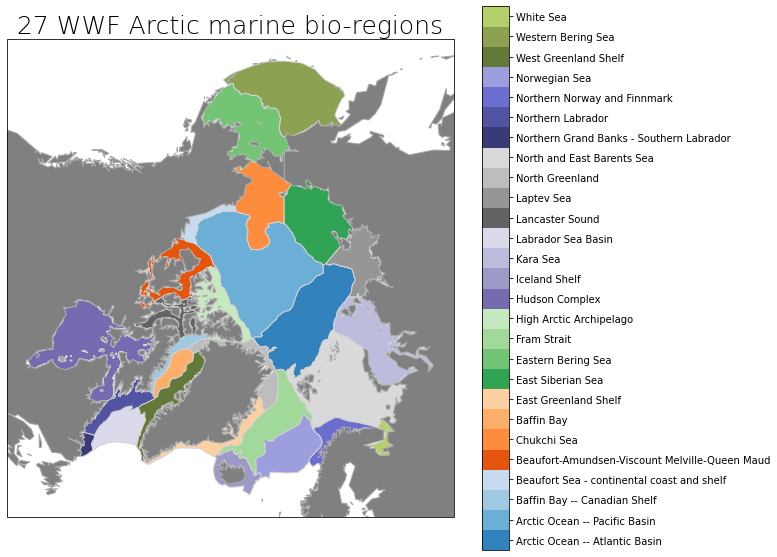

In [11]:
fig, ax = plt.subplots(figsize=(10, 10),subplot_kw=dict(projection=crs))

# set colormap #
cmap1=cm.get_cmap('tab20c')
cmap2=cm.get_cmap('tab20b')

ncolors = np.vstack([np.array(cmap1.colors),np.array(cmap2.colors)])
ncolors = ncolors[:27,:]
cmap = ListedColormap(ncolors)

norm = cm.colors.Normalize(vmin=0, vmax=27)
sm = plt.cm.ScalarMappable(cmap=cmap,norm=norm)


wwf.plot(categorical=True, legend=True,ax=ax, cmap=cmap, edgecolor='lightgray')

# OPTION 1: low definition lands #
#ax.add_feature(cartopy.feature.LAND, zorder=1,facecolor='lightgray', edgecolor='gray')
#ax.coastlines(resolution='50m',color,'darkgray')

# OPTION 2: high definition lands #
lands = cartopy.feature.GSHHSFeature(scale='auto', levels=[2])
ax.add_feature(lands, edgecolor='darkgray', facecolor='gray', zorder=1)

# Add a title
ax.set_title('27 WWF Arctic marine bio-regions', fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar as a legend
cbar = fig.colorbar(sm, spacing = 'uniform', orientation = 'vertical',ticks=np.arange(0.5,27.5,1))
cbar.ax.set_yticklabels(wwf.Name)


plt.savefig("../figures/wwf_arctic27bioregions.png", dpi=300)

In [352]:
pwd

'/home/hbkoziel/earth-analytics-python-env'